<a href="https://colab.research.google.com/github/asoushawk/redditinterest/blob/main/Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw

import praw
import random
from praw.models import MoreComments
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


reddit = praw.Reddit(
     client_id="A4pjgLj-HChYmA",
     client_secret="-SPf5aNyRtqnrCDxW9cEHULT9u0",
     user_agent="my user agent", check_for_async=False)

**Coleta de usernames no subreddit, nos comentários em publicações**

In [ ]:
#Função para limpar o console
def clear(): 
  
    import os
    os.system('cls' if os.name == 'nt' else 'clear')

#Coleta nome de usuários
sub = "apple"
authors = list()


def getauthors():
  for submission in reddit.subreddit(sub).hot(limit=5): #limit=quantia de publicações
    print(submission.title)
    for post in submission.comments.list():
      try:
        redditorname = post.author
        print(redditorname.name)
        yield str(redditorname)
      
      except:
        pass  

for author in getauthors():
  authors.append(author)



**Remoção de usuários duplicados**

In [101]:
def remov_duplicates():
   fhandle2 = open("authors1.txt", "w")
   st = authors
   for i in range(0, len(st)):
      st[i] = "".join(st[i])
      dupli = Counter(st)
      s = " ".join(dupli.keys())
      fhandle2.write(s)
      fhandle2.write(" ")
     
clear()
print ("removendo usuários duplicados...")      
remov_duplicates()
print("done")

removendo usuários duplicados...
done


**Scraping dos perfis e contagem de subs**

In [239]:
a = 0
final = list()
def comments(a, added_subs):
  v = 0
  added_subs = []
  for comment in reddit.redditor(authors[a]).comments.new(limit=30):
    sub = comment.subreddit
    sub = str(sub)
    if v > 10:
      break
    if sub not in added_subs:
      added_subs.append(sub)
      final.append(sub)
      v = v + 1


for _ in range(100):
  counts = Counter(final)
  print("Usuários:", a)
  print(counts)
  a = a + 1
  
  comments(a, added_subs)
  clear()



Usuários: 0
Counter()
Usuários: 1
Counter({'apple': 1, 'ipad': 1, 'Marvel': 1, 'teenagers': 1, 'ShouldIbuythisgame': 1, 'Dentistry': 1, 'AppleWatch': 1, 'mildlyinteresting': 1, 'memes': 1, 'Boruto': 1, 'mkindia': 1})
Usuários: 2
Counter({'apple': 2, 'ipad': 1, 'Marvel': 1, 'teenagers': 1, 'ShouldIbuythisgame': 1, 'Dentistry': 1, 'AppleWatch': 1, 'mildlyinteresting': 1, 'memes': 1, 'Boruto': 1, 'mkindia': 1, 'NintendoSwitch': 1, 'AnimalCrossing': 1, 'ac_newhorizons': 1, 'Asthma': 1, 'Sneakers': 1, 'FIFA': 1, 'pokemon': 1, 'pokemontrades': 1, 'VGC': 1, 'chelseafc': 1})
Usuários: 3
Counter({'apple': 3, 'ipad': 1, 'Marvel': 1, 'teenagers': 1, 'ShouldIbuythisgame': 1, 'Dentistry': 1, 'AppleWatch': 1, 'mildlyinteresting': 1, 'memes': 1, 'Boruto': 1, 'mkindia': 1, 'NintendoSwitch': 1, 'AnimalCrossing': 1, 'ac_newhorizons': 1, 'Asthma': 1, 'Sneakers': 1, 'FIFA': 1, 'pokemon': 1, 'pokemontrades': 1, 'VGC': 1, 'chelseafc': 1, 'CFB': 1, 'buildapc': 1, 'ultrawidemasterrace': 1, 'nvidia': 1, 'patie

In [240]:
counts = Counter(final) 
mostcommon = [mc for mc,cnt in counts.most_common(15)]
result = pd.DataFrame(mostcommon,columns=['subs'])
result1 = pd.DataFrame(counts, columns=['subs'])

In [ ]:
a = 1
percentages = []
frequencies = []
for _ in range(14):
  
  frequency = int(counts[mostcommon[a]])
  frequency = int(frequency)
  percentage = (frequency / 100) * 100
  print(percentage)
  a = a + 1
  percentages.append(percentage)
  frequencies.append(frequency)

percentage =  [
               (mostcommon[0], frequencies[0], percentages[0]),
               (mostcommon[1], frequencies[1], percentages[1]),
               (mostcommon[2], frequencies[2], percentages[2]),
               (mostcommon[3], frequencies[3], percentages[3]),
               (mostcommon[4], frequencies[4], percentages[4]),
               (mostcommon[5], frequencies[5], percentages[5]),
               (mostcommon[6], frequencies[6], percentages[6]),
               (mostcommon[7], frequencies[7], percentages[7]),
               (mostcommon[8], frequencies[8], percentages[8]),
               (mostcommon[9], frequencies[9], percentages[9]),
               (mostcommon[10], frequencies[10], percentages[10])]
    

            




In [243]:
percentagedf = pd.DataFrame(percentage)
percentagedf[1] = percentagedf[1].astype(float)
percentagedf[2] = percentagedf[2].astype(float)
percentagedf

,0,1,2
0,apple,13.0,13.0
1,AskReddit,10.0,10.0
2,iphone,7.0,7.0
3,worldnews,6.0,6.0
4,news,5.0,5.0
5,memes,5.0,5.0
6,xboxone,5.0,5.0
7,movies,5.0,5.0
8,funny,5.0,5.0
9,unpopularopinion,4.0,4.0


Subreddits mais populares entre usuários do /r/apple:

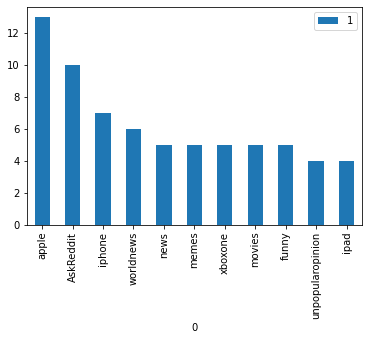

In [244]:
percentagedf.plot(
    x = 0, y = 1, kind = 'bar'
)

In [108]:
print(result)

                subs
0              apple
1          AskReddit
2             iphone
3     NintendoSwitch
4           baseball
5               news
6             acorns
7   OaklandAthletics
8              Music
9             movies
10        AppleWatch
11         apolloapp
12         worldnews
13   blackopscoldwar
14              ipad
